In [181]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print("URL",s)
df=pd.read_csv(s,header=None,encoding="utf-8")
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

URL https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [182]:
import numpy as np

class Perceptron(object):
# 퍼셉트론 이라는 클래스를 정의함 여기서 괄호안의 object는 안써도 되지만 
# 파이썬2에서는 써줘야 했었기에 파이썬 2와의 호환을 위해서 적어준 것이다. 

    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    # 클래스안에 객체를 생성하면 자동으로 실행되는 생성자를 설정해준것 
    # 각각의 매개변수에 일정한 값을 넣어주고 객체를 생성할때마다 설정한 값이 들어가도록 한것
    def fit(self, X, y):
           # fit함수를 정의하고 변수는 X,y self는 fit매서드를 불러올떄 객체와 메서드를 바인딩해주는 역할을 하는것
           # 1) 이 함수 내용은 X와 y의 데이터 셋을 알고 있는 상태에서 시작
           # 2) 먼저 임의의 가중치를 만들고
           # 3) X와 y의 데이터 셋들을 넣어보면서 오차 만큼 뺏다 더했다하면서 가중치를 학습시켜서 객체를 리턴해줌
           # 이 객체안에는 w_변수, errors 변수가 있고 각각 데이터가 들어있다.   
            
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        # 앞전에 랜덤스테이트 함수를 rgen에 넣어둔것임 괄호안의 숫자는 랜덤 시드로 지정해두면 이전과 동일한 결과를 재현할 수 있음
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        # 평균이0 스케일이0.01 배열이 X의 열 갯수 +1 갯수만큼의 정규분포형태를 만들고 거기서 샘풀을 추줄해서 가중치 리스트에 넣음(임의의 가중치를 만든거라고 보면됨)
        self.errors_ = []
        # 공리스트를 만듬
   

        for _ in range(self.n_iter):
              # n_iter만큼 50까지의 리스트를 만들어서(50번 반복용도) 밑에 함수를 50번 반복하고 self값을 리턴함
            errors = 0
            # errors에 0값을 넣어둠
            for xi, target in zip(X, y):
                # 피쳐와 레이블을 딕셔너리로 만들어서 각각 xi:피쳐와 타겟:레이블에 넣은것 
                update = self.eta * (target - self.predict(xi))
                # 객체 안에 업데이트 라는 변수가 가르키는 공간에 오차*학습률 한것을 넣고(델타 더블유)
                self.w_[1:] += update * xi
                # 가중치리스트 1부터 끝까지 오차*학습률*피쳐해서 가중치를 업데이트
                self.w_[0] += update
                # 가중치리스트 0번인덱스에 오차*학습률을 넣고 여기는 절편 업데이트
                errors += int(update != 0.0)
                # 에러에 오차가 0이 되었는지 안되었는지를 판단해서 0,1값을 넣는다 
            self.errors_.append(errors)
            # 공리스트에 errors값을 추가 -> 잘못 분류된 횟수를 기록하는 역할1
        return self

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
      # X와 가중치 리스트를 내적하고 가중치 리스트의 0 인덱스(절편)를 더해준다. 

    def predict(self, X):
        # 객체에 입력값을 다 넣어서 0이상이면 1을 그렇지 않으면 -1을 출력하는 predict메서드를 정의
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [183]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
# 가중치를 0으로 초기화하면 안된다는거를 보여줄라고 해본 것 

0.0

2.2.2붓꽃 데이터에서 퍼셉트론 
 -> 이제 퍼셉트론을 활용해서 붓꽃데이터를 분류해볼 것

In [185]:
df.tail()
# 데이터가 제대로 로드되었는지를 보고자 tail함수를 씀

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [189]:
df.columns
# 이 데이터 프레임이 칼럼값을 알고싶어서 해봤는데 01234로 되어있음 
# 실제는 0번칼럼 꽃받침 길이(sepal length),1번 꽃받침 너비(sepal width) 2번칼럼 꽃잎 길이(petal length) 3번칼럼 꽃잎 너비(petal length)

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [191]:
df.shape
print(df)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
y=df.iloc[0:100,4].values
# y라는 변수에 0~100까지행에 4번칼럼(레이블)를 확인해서 
# iris setosa면 -1아니먄 1을 넣는다
y=np.where(y=="Iris-setona",-1,1)
# y는 100*1차원의 데이터프레임

In [194]:
X=df.iloc[0:100,[0,2]].values
# X라는 변수에 0~100행의 0이상2미만 까지의 칼럼의 값들을 추출해서 넣음 100*2차원의 데이터프레임
print(X.shape)

(100, 2)


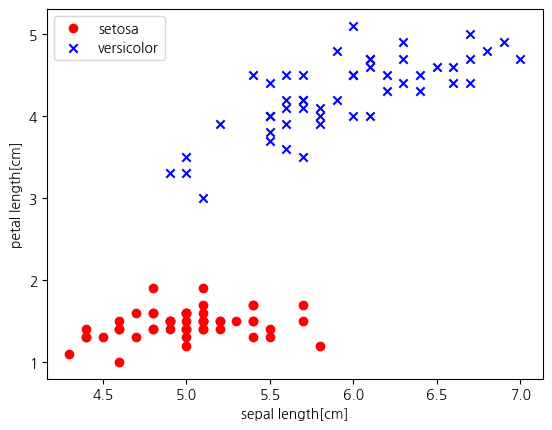

In [ ]:
# 꽃의 종류에 따라 꽃받침과 꽃잎의 산점도를 그려봄 
# 명확히 구분되니 결정 경계를 지정하면 분류기를 만들 수 있을 것임
# 0~50 50~100이 구분되어있으니 이런식으로 나눠서 그래프를 그릴 수 있는것임
plt.scatter(X[:50,0],X[:50,1],color="red",marker="o",label="setosa")
plt.scatter(X[50:100,0],X[50:100,1],color="blue",marker="x",label="versicolor")
plt.xlabel("sepal length[cm]")
plt.ylabel("petal length[cm]")
plt.legend(loc="upper left")
plt.show()

In [ ]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


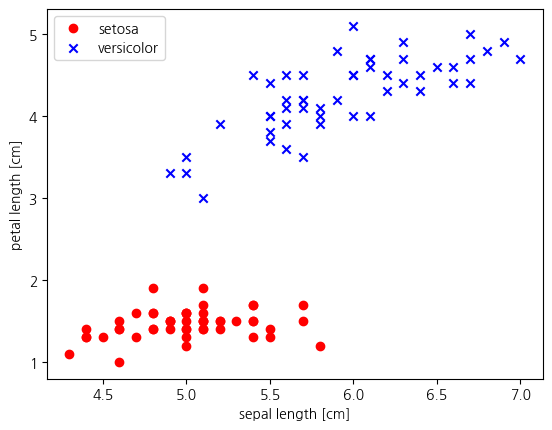

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택합니다
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다
X = df.iloc[0:100, [0, 2]].values

# 산점도를 그립니다
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

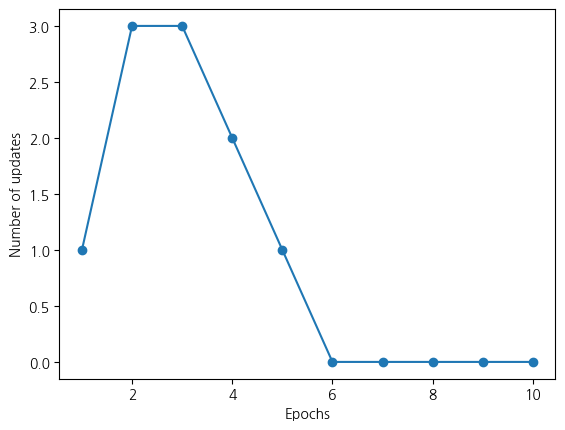

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
# 학습률 0.1 반복횟수10으로 퍼셉트론 함수를 불러오고

ppn.fit(X, y)
# 데이터를 학습시킴
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
# 1부터 실패횟수+1만킁의 리스트를 만들어서 X축 eoors횟수를 y축에 넣고
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

c:\ProgramData\Anaconda3\envs\mcl1\lib\site-packages\ipykernel_launcher.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


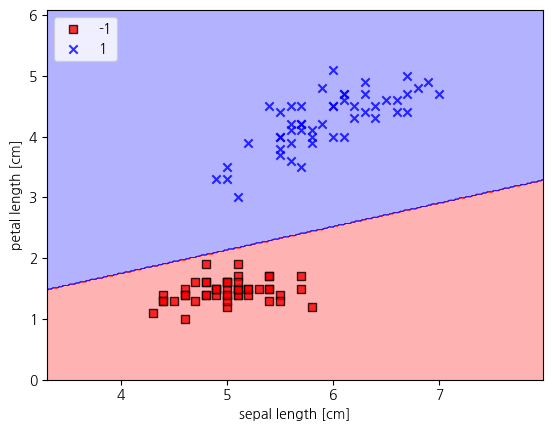

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [213]:
print(X.shape)
rgen = np.random.RandomState(1)
w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
# size에는 3이 들어갈것이고
print(w)
print(w.shape)
w1=np.dot(X, w[1:]) + w[0]
# 100*2행렬과 2*1행렬의 도트곱을 하면 100*1의 배열이 남는다.



(100, 2)
[ 0.01624345 -0.00611756 -0.00528172]
(3,)


2.3 아달린 함수도 써볼것 
퍼셉트로는 활성화 함수로 단위계단 함수를 쓰는데 아달린 함수는 선형 활성화 함수를 사용함
또한 오차함수로서 제곱 오차함을 사용한다.

In [192]:
class AdalineGD(object):
      # 여기는 퍼셉트론처럼 개별 데이터셋에 대해서 학습하지 않고 전체 훈련데이터셋으로 그레디언트를 계산함
    """적응형 선형 뉴런 분류기


    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    # 클래스에 속하는 객체를 생성하면 자동으로 실행되는 생성자를 설정해준것 
    # 각각의 매개변수에 일정한 값을 넣어주고 객체를 생성할때마다 설정한 값이 들어가도록 한것

    def fit(self, X, y):
           # fit함수를 정의하고 변수는 X,y self는 fit매서드를 불러올떄 객체와 메서드를 바인딩해주는 역할을 하는것
           # 1) 이 함수 내용은 X와 y의 데이터 셋을 알고 있는 상태에서 시작
           # 우리가 이번챕터에서 여기에다가 넣을 X는 100*2의 행렬임 y값은 붓꽃종류를 숫자로 변환한 타깃 행렬이다.
           # 2) 먼저 임의의 가중치를 만들고
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        # rgen에 randomstate함수를 넣어주고
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        # 평균이 0 스케일이 0.01인 정규분포에서 열갯수+1(.shape[1]이 열의갯수라는 뜻)인 사이즈 난수로 리스트를 만듬 임의의 가중치를 만들어준 것
        # 지금 우리가 이번챕터에서 쓰는 X는 100*2의 데이터프레임임 즉 2+1인 3개의 원소를 갖는 배열이 나온다 
        # 파이썬에서 1차원배열은 무조건 가로로 표현되나 shpae를 찍어보면 (3,)형태의 배열이다.
        self.cost_ = []
        # 공 리스트를 만듬

        for i in range(self.n_iter):
              # 미리설정한 0~n_iter까지 원소로 갖는 리스트를 만들고 그거를 하나씩 i에 넣으면서 함수를 실햄함 
              # 결국에는 n_iter만치 반복한다는 뜻임 
            net_input = self.net_input(X)
            # 아래에서 정의한 넷 인풋이라는 함수를 써서 최종입력을 계산해서 넷인풋에 넣음
            # 여기서 넷인풋 함수는 입력과 가중치 리스트를 내적하고 절편을 더해서 Z(최종입력)을 만들어주는 함수다 
            # 100*1의 배열이 저장됨
            output = self.activation(net_input)
            # 계산한 최종입력을 활성화함수를 써서 아웃풋에 넣었으나 활성함수로 선형함수를 쓰기에 넣은 값 그대로 출력함
            errors = (y - output)
            # y-100*1의 배열을 뺴서 에러에 저장되고 에러 역시 100*1의 배열이다.
            self.w_[1:] += self.eta * X.T.dot(errors)
            # 가중치를 업데이트 하는데 +=는 왼쪽값에 오른쪽값을 더하고 왼쪽에다가 넣는다는 뜻임
            # 학습률*X의 트랜즈포스*에러 배열로 가중치를 업데이트함
            self.w_[0] += self.eta * errors.sum()
            # 절편값은 학습률*에러
            cost = (errors**2).sum() / 2.0
            # 코스트는 error제곱의 행끼리의 합계를 구해서 2로 나눈것을 넣는다
            self.cost_.append(cost)
            # 공리스트에 cost를 계속 추가함
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
      # 입력과 가중치리스트를 내적하고 절편을 곱해서 Z(최종입력)을 만들어주는 함수를 정의한것
      # 100*2배열과 2*1배열의 곱이고 결과는 100*1이 배열이 될것이다. 

    def activation(self, X):
        """선형활성화 함수를 쓰기에 X그대로를 리턴함"""
        #  함수를 정의했는데 X를 입력하면 그대로 X를 출력하는 함수를 정의
        return X

    def predict(self, X):
        # """활성화 함수가 0보다 크면 1아니면 -1을 리턴함"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

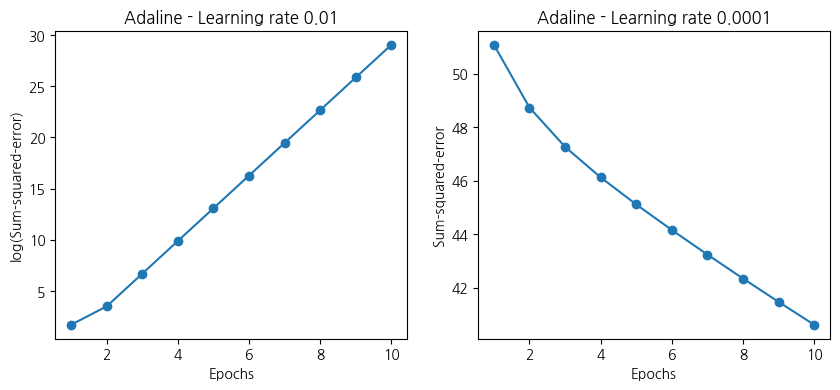

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [ ]:
X_std=np.copy(X)
# X_std라는 변수에 X를 카피하고
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
# 전체 행, 0번쨰 열에 대해서 표준화를한다
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()
# 전체 행, 1번쨰 열에 대해서 표준화를한다

c:\ProgramData\Anaconda3\envs\mcl1\lib\site-packages\ipykernel_launcher.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


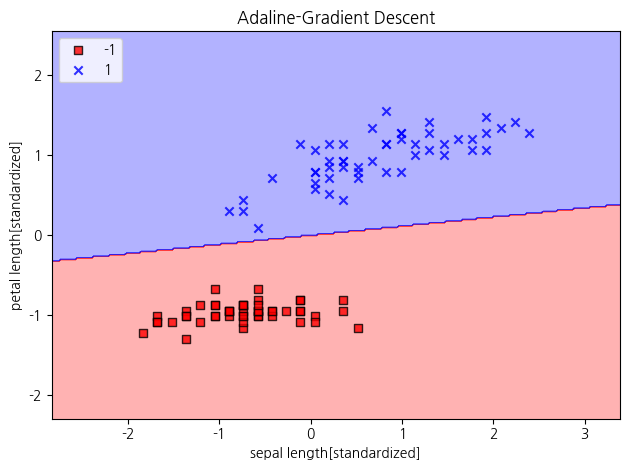

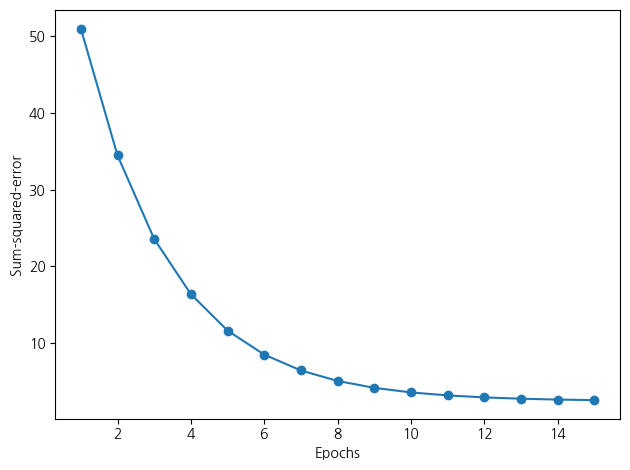

In [ ]:
ada=AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.title("Adaline-Gradient Descent")
plt.xlabel("sepal length[standardized]")
plt.ylabel("petal length[standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker="o")
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.tight_layout()
plt.show()